# Part II - (Loan Data From Prosper)
## by (MURHULA BYABUSHI CHRISTIAN)

## Investigation Overview

In this investigation, i wanted tho analyse the elements that influence the loan and borrows, by interpreting technically some variables.

## Dataset Overview
Prosper-Loan dataset contains 113937 entries of loan with113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. 

In [24]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [25]:
# load in the dataset into a pandas dataframe
loan_data_prosper = pd.read_csv('prosperLoanData.csv') 
loan_data_prosper.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [26]:
cols = ['ProsperRating (Alpha)','EmploymentStatus', 'ListingCategory (numeric)',
        'LoanOriginalAmount', 'LoanStatus','MonthlyLoanPayment',
        'BorrowerRate', 
         'BorrowerAPR',
        'EstimatedLoss','EstimatedReturn',
        'Term', 'StatedMonthlyIncome']

In [5]:
df_loan_data = loan_data_prosper[cols] 
df_loan_data 

,ProsperRating (Alpha),EmploymentStatus,ListingCategory (numeric),LoanOriginalAmount,LoanStatus,MonthlyLoanPayment,BorrowerRate,BorrowerAPR,EstimatedLoss,EstimatedReturn,Term,StatedMonthlyIncome
0,NaN,Self-employed,0,9425,Completed,330.43,0.1580,0.16516,NaN,NaN,36,3083.333333
1,A,Employed,2,10000,Current,318.93,0.0920,0.12016,0.0249,0.05470,36,6125.000000
2,NaN,Not available,0,3001,Completed,123.32,0.2750,0.28269,NaN,NaN,36,2083.333333
3,A,Employed,16,10000,Current,321.45,0.0974,0.12528,0.0249,0.06000,36,2875.000000
4,D,Employed,2,15000,Current,563.97,0.2085,0.24614,0.0925,0.09066,36,9583.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
113932,C,Employed,1,10000,Current,364.74,0.1864,0.22354,0.0699,0.09500,36,4333.333333
113933,A,Employed,7,2000,FinalPaymentInProgress,65.57,0.1110,0.13220,0.0200,0.08070,36,8041.666667
113934,D,Employed,1,10000,Current,273.35,0.2150,0.23984,0.1025,0.08578,60,2875.000000
113935,C,Full-time,2,15000,Completed,449.55,0.2605,0.28408,0.0850,0.15950,60,3875.000000


In [6]:
#generate the simple statistic of null values in columns : 
df_loan_data.isnull().sum()

ProsperRating (Alpha)        29084
EmploymentStatus              2255
ListingCategory (numeric)        0
LoanOriginalAmount               0
LoanStatus                       0
MonthlyLoanPayment               0
BorrowerRate                     0
BorrowerAPR                     25
EstimatedLoss                29084
EstimatedReturn              29084
Term                             0
StatedMonthlyIncome              0
dtype: int64

In [7]:
#take all except that duplicated values
df_loan_data = df_loan_data[~df_loan_data.duplicated()]

In [8]:
#Properating of ordered 
ranging_rating = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR'] 
range_var  = pd.api.types.CategoricalDtype(ordered=True, categories =ranging_rating )
df_loan_data['ProsperRating (Alpha)'] = df_loan_data['ProsperRating (Alpha)'].astype(range_var)

In [9]:
df_loan_data = df_loan_data.rename(columns={df_loan_data.columns[2] : 'ListingCategorie'}) 

In [10]:
df_loan_data['ListingCategorie'] = df_loan_data['ListingCategorie'].astype(str)

In [11]:
#Function to attribute the corresponded value to each Listing Categorie
def parse_values(x): 
    if x=="0":
        return  "Not Available" 
    if x == "1":
        return  "Debt Consolidation"
    if x =="2" :
        return  "Home Improvement"
    if x =="3":
        return "Business"
    if x =="4":
        return "Personal Loan"
    if x =="5":
        return "Student Use"
    if x =="6":
        return "Auto"
    if x =="7":
        return "Other"
    if x =="8":
        return "Baby&Adoption"
    if x =="9":
        return "Boat"
    if x =="10":
        return "Cosmetic Procedure"
    if x =="11":
        return "Engagement Ring"
    if x =="12":
        return  "Green Loans"
    if x =="13":
        return  "Household Expenses"
    if x =="14":
        return  "Large Purchases"
    if x =="15":
        return  "Medical/Dental"
    if x =="16":
        return  "Motorcycle"
    if x =="17":
        return  "RV"
    if x =="18":
        return  "Taxes"
    if x =="19":
        return  "Vacation"
    if x =="20":
        return  "Wedding Loans"
    else:
        return x

## How is the borrower rate interest ?

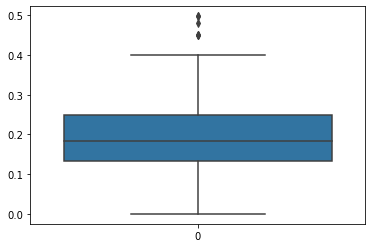

In [12]:
 
sb.boxplot(data = df_loan_data["BorrowerRate"]);

his chart shows us that the lowest borrow rate is 0%, the common is around 0.2, and the highest is 0.4. But some loans pay more than that as the points out of the the max value of the plot shows.

### How is statitic of general payment reliazed for each loan status?

In [13]:
nb_df_loan_data_loan_statu = df_loan_data['LoanStatus'].value_counts()
max_nb_df_loan_data_loan_statu = nb_df_loan_data_loan_statu[0]
#the proportion of the maw value 
proportion = max_nb_df_loan_data_loan_statu / df_loan_data.shape[0] 
tick_props = np.arange(0,proportion,0.05)
#reduce all the tickets at 100 percent 
tick_names = ['{:0.2f}'.format(i) for i in tick_props] 
type_order = nb_df_loan_data_loan_statu.index 

In [14]:
baseColor = baseColor = sb.color_palette()[4]

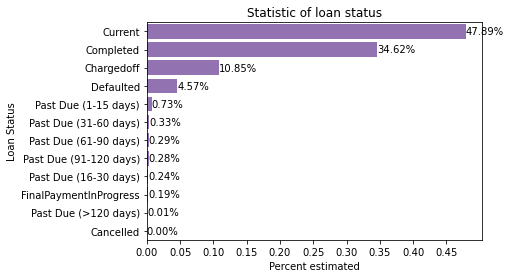

In [15]:
sb.countplot(data=df_loan_data, y='LoanStatus', color=baseColor, order =type_order);
plt.xticks (tick_props*df_loan_data.shape[0], tick_names);  

#handle percent
n_loan_statu = df_loan_data.shape[0]

for i in range(nb_df_loan_data_loan_statu.shape[0]): 
    count = nb_df_loan_data_loan_statu[i]
    loan_statu_string = '{:0.2f}%'.format(100*count/n_loan_statu) 
    plt.text(count, i, loan_statu_string, va ='center');
plt.title('Statistic of loan status'); 
plt.xlabel('Percent estimated');
plt.ylabel('Loan Status');

The plot shows that t, the current status has more percent with 49.66%.

### How is the the correlation between the loan amount and the borrower interest rate ?

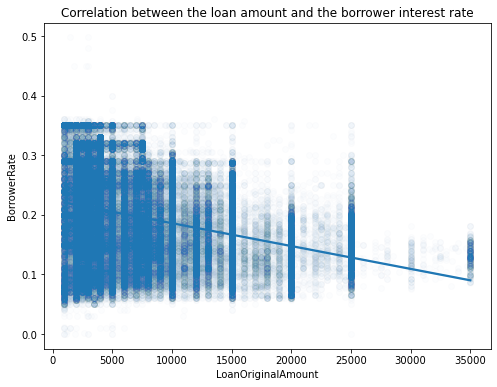

In [16]:
plt.figure(figsize = [8, 6])
sb.regplot(data = df_loan_data, x = 'LoanOriginalAmount', y = 'BorrowerRate', scatter_kws={'alpha':0.01}); 
plt.title("Correlation between the loan amount and the borrower interest rate");

This plot shows the loaOriginalAMount increases overtime, the Borrowerate decreases. The coorelation between both is negative

### Whitch loan amount every listing category has accumulated ?

In [17]:
#function for set the size of figure
def figure_resize(f, w, h):
    f.set_figwidth(w)
    f.set_figheight(h)

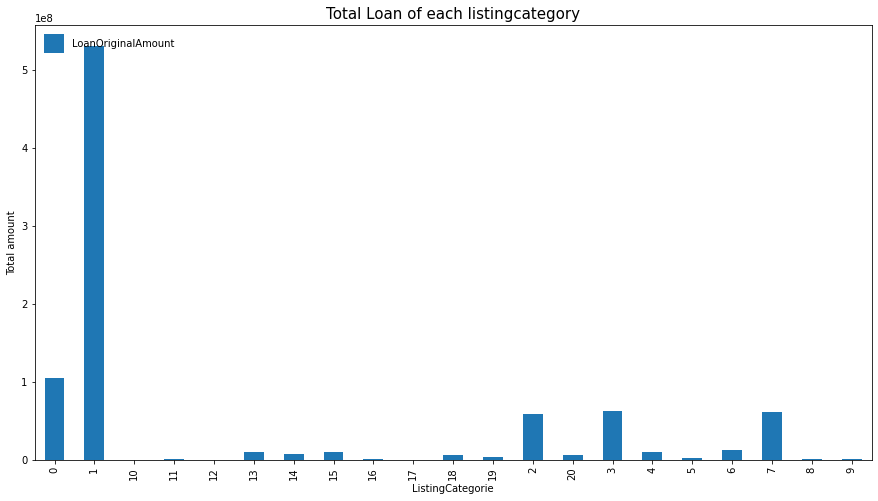

In [18]:
fig, ax = plt.subplots() 

#plot formatting
figure_resize(fig, 15,8)
plt.title('Total Loan of each listingcategory', fontsize=15)

df_loan_data.groupby('ListingCategorie', as_index = True)['LoanOriginalAmount'].sum().plot.bar() 


plt.legend(loc='upper left',ncol=2,handleheight=2.5, labelspacing=0.05, frameon=False) 
plt.ylabel('Total amount')
plt.show() 

By looking at this plot we notice that the loan contracted as debt Consolidation is estimated to 1 billion dollars 

### How is the coorelation between numerical variables inside of the data?

In [19]:
num_var = ['EstimatedReturn', 'EstimatedLoss', 'BorrowerAPR'
           , 'BorrowerRate', 'MonthlyLoanPayment', 'LoanOriginalAmount' ]

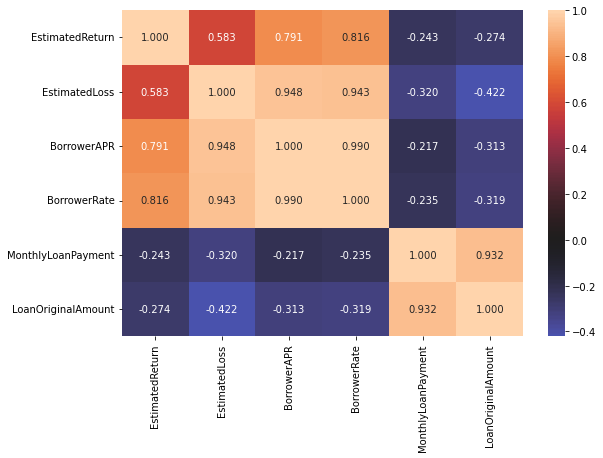

In [20]:
# correlation plot
plt.figure(figsize = [9, 6])
sb.heatmap(df_loan_data[num_var].corr(), annot = True, fmt = '.3f', center = 0);

This plot shows that the LoanOriginalAmount with even the borrower rate nor borrowerAPR is negative, estimated at -0.3. This means as the LoanOrignalAmount increases, the BorrowerRate decreases.

### What is the duration of the loan offered by borrowers according to their status ?

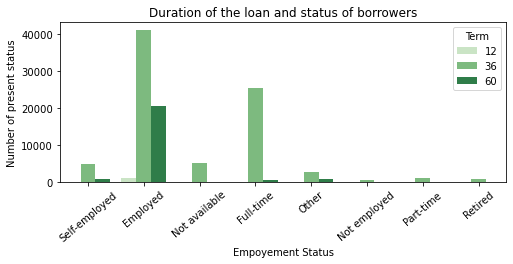

In [21]:
plt.figure(figsize = [8, 10])
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df_loan_data, x = 'EmploymentStatus', hue = 'Term', palette ="Greens") 
plt.ylabel("Number of present status"); 
plt.xlabel("Empoyement Status"); 
plt.title("Duration of the loan and status of borrowers");
plt.xticks(rotation=40);


The graph shows that borrowers who are salaried most often grant the loan estimated at 36 and 60 for the others.

### What is the borrower's loan status rate based on their prosperity rating?

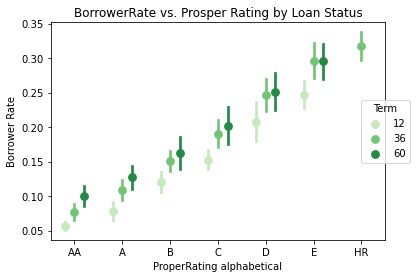

In [23]:
# fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df_loan_data_selected_status, x = 'ProsperRating (Alpha)', y = 'BorrowerRate', hue = 'Term',
           palette = 'Greens', linestyles = '', dodge = 0.4, ci='sd')
plt.title('BorrowerRate vs. Prosper Rating by Loan Status')
plt.ylabel('Borrower Rate') 
plt.xlabel('ProperRating alphabetical')
plt.legend(loc = 10, title="Term", bbox_to_anchor = (1.0, 0.5)) ;
plt.show();


This graph shows that the standard deviation of each properRating depends each one during a all terms represented(12,36 and 60 months). Obsiouly the properrating with HR return a higher rate interest.